**By: Nathan Ho**

# Basketball 'Clutch' - Kobe Bryant vs. Michael Jordan

## Introduction: What is 'Clutch'?
In sports, a 'clutch' play is typically a play which occurs in the key moment of a game that puts the outcome of the game in question. This could be a hail-mary pass in football, an 11th inning double play in baseball, or a save on a penalty kick in soccer. 

However, in basketball, where the game often revolves around the selective few superstars in the league, 'clutch'ness describes more the player than the play. A 'clutch' player is a player who thrives in high pressure situations and becomes a more versatile and efficient player when the game is on the line. 'Clutch' plays are explained as the handiwork of 'clutch' players. 

It's easy for most basketball fans and sports commentator to talk about 'clutch' qualitatively. Conversations about the strength of a player's mentality can get very opionated as it is unquantifiable. In this project, we will explore the quantitative side of 'clutch', and will be analyzing the career statistics of two widely alleged 'clutch' players: Kobe Bryant and Michael Jordan. [Comparisons](http://bleacherreport.com/articles/311555-why-kobejordan-debate-is-closer-than-it-seems) have often been drawn between the two players, and it will be interesting to take a statistical approach in evaluating them.   

We will be specifically looking at:
1. Distributions of points scored, assists, rebounds, and steals in Regular and Post Season 
2. Linear regressions of the two players' production efficiency, measured by the Points Per Minute(PPM) metric
3. Comparisons between two players to evaluate the effects of 'clutch' on each of their careers


We will begin by importing the relevant libraries:


In [57]:
#importing data organization and graphics packages
import pandas as pd                  
import matplotlib.pyplot as plt       
%matplotlib inline 
import numpy as np
import scipy.stats as stats
import datetime as dt
import sys
import seaborn as sb
import warnings
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 
warnings.filterwarnings('ignore')

Today is 2016-12-20
What version of Python are we running? 
3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


### NBA Python Module

The data we will be using for this project will be coming from Savvastj's [`nbashots`](https://github.com/savvastj/nbashots/blob/master/tutorial/Tutorial.ipynb) module. This module accesses the stats.nba.com API through specialized methods.

To install, please run on your Terminal/Command Prompt:

`pip install nbashots` 

We will be importing this package for the project:

In [3]:
#NBA module
import nbashots as nba

The module organizes player statistics by Player IDs. Here we will take a brief look at Kobe's ID and game statistics from the most recent season, 2015-16:

In [4]:
kobe_id = nba.get_player_id("Bryant, Kobe")[0]
kobe_id

977

In [5]:
kobe_gamelogs = nba.PlayerLog(kobe_id)
kobe_df = kobe_gamelogs.get_game_logs()
kobe_df.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22015,977,0021501228,2016-04-13,LAL vs. UTA,W,42,22,50,0.440,...,4,4,4,1,1,2,1,60,7,1
1,22015,977,0021501209,2016-04-11,LAL @ OKC,L,19,4,12,0.333,...,1,1,0,1,0,2,2,13,-24,1
2,22015,977,0021501195,2016-04-10,LAL @ HOU,L,27,10,22,0.455,...,2,2,1,2,0,4,1,35,-10,1
3,22015,977,0021501184,2016-04-08,LAL @ NOP,L,22,4,15,0.267,...,3,3,4,1,0,2,0,14,-16,1
4,22015,977,0021501172,2016-04-06,LAL vs. LAC,L,28,6,19,0.316,...,3,3,1,1,0,1,1,17,-15,1


In [6]:
print(kobe_df.dtypes)
print()
print(kobe_df.shape)

SEASON_ID                  object
Player_ID                   int64
Game_ID                    object
GAME_DATE          datetime64[ns]
MATCHUP                    object
WL                         object
MIN                         int64
FGM                         int64
FGA                         int64
FG_PCT                    float64
FG3M                        int64
FG3A                        int64
FG3_PCT                   float64
FTM                         int64
FTA                         int64
FT_PCT                    float64
OREB                        int64
DREB                        int64
REB                         int64
AST                         int64
STL                         int64
BLK                         int64
TOV                         int64
PF                          int64
PTS                         int64
PLUS_MINUS                  int64
VIDEO_AVAILABLE             int64
dtype: object

(66, 27)


Thankfully, the data returned is mostly in `int` and `float` form, making it easier to analyze the data. The dataframe shape shows that Kobe played 66 games during the 2015-2016 regular season.

Now we take a brief look at Jordan's ID and statistics:

In [7]:
jordan_id = nba.get_player_id("Jordan, Michael")[0]
jordan_id

893

In [8]:
jordan_gamelogs = nba.PlayerLog(jordan_id)
jordan_df = jordan_gamelogs.get_game_logs()
jordan_df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE


The lack of data is due to the `PlayerLog` method being defaulted to the 2015-16 season. Michael Jordan, who retired in 2003, obviously did not play then.   

According to the module creator, Savvastj, the `PlayerLog` method has four parameters:
* `player_id`
* `league_id`, 
    * default "`'00'`"
* `Season` 
    * default "`2015-16`" 
* `Season_Type` 
    * default "`Regular Season`"
    
This can be corrected by changing the `Season` parameter to the 1995-96 season instead. The 1995-96 is a very famous season for the Chicago Bulls, when Jordan's Bulls earned 72 wins and 10 losses, becoming the [only team](https://en.wikipedia.org/wiki/1995–96_Chicago_Bulls_season) in NBA history to win over 70 games and the NBA title in the same season.  

In [9]:
jordan_gamelogs = nba.PlayerLog(jordan_id, '00', '1995-96', 'Regular Season')
jordan_df = jordan_gamelogs.get_game_logs()
jordan_df.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,21995,893,0029501188,1996-04-21,CHI @ WAS,W,24,11,22,0.500,...,3,4,4,4,0,1,0,26,None,0
1,21995,893,0029501175,1996-04-20,CHI vs. IND,L,31,9,23,0.391,...,2,2,6,1,1,3,4,24,None,0
2,21995,893,0029501158,1996-04-18,CHI vs. DET,W,24,11,18,0.611,...,4,5,1,1,0,2,1,30,None,0
3,21995,893,0029501144,1996-04-16,CHI @ MIL,W,42,9,27,0.333,...,8,9,4,2,1,4,1,22,None,0
4,21995,893,0029501134,1996-04-14,CHI @ CLE,W,35,11,18,0.611,...,9,12,3,1,0,3,0,32,None,0


By changing the `Season_Type` parameter to `'Playoffs'`, we can pull Jordan's playoff games instead.

In [10]:
jordan_gamelogs1 = nba.PlayerLog(jordan_id, '00', '1995-96', 'Playoffs')
jordan_df1 = jordan_gamelogs1.get_game_logs()
jordan_df1.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,41995,893,0049500068,1996-06-16,CHI vs. SEA,W,43,5,19,0.263,...,6,9,7,2,0,5,3,22,None,0
1,41995,893,0049500067,1996-06-14,CHI @ SEA,L,43,11,22,0.500,...,2,4,1,1,0,2,3,26,None,0
2,41995,893,0049500066,1996-06-12,CHI @ SEA,L,41,6,19,0.316,...,2,3,2,1,0,4,3,23,None,0
3,41995,893,0049500065,1996-06-09,CHI @ SEA,W,41,11,23,0.478,...,1,3,5,2,0,3,1,36,None,0
4,41995,893,0049500064,1996-06-07,CHI vs. SEA,W,43,9,22,0.409,...,4,6,8,2,0,2,3,29,None,0


We can do some simple analysis on the data we pull by applying some `pandas` methods.

According to the shape and mean of the `jordan_df` dataframe, Jordan played 82 games, or the full season, in the 1995-96 regular season, and averaged 30 points, 4 assists, 2 steals and almost 7 rebounds a game:

In [11]:
print(jordan_df.shape)

(82, 27)


In [12]:
jordan_df.mean()

Player_ID          893.000000
MIN                 37.682927
FGM                 11.170732
FGA                 22.560976
FG_PCT               0.494646
FG3M                 1.353659
FG3A                 3.170732
FG3_PCT              0.342037
FTM                  6.682927
FTA                  8.012195
FT_PCT               0.829329
OREB                 1.804878
DREB                 4.817073
REB                  6.621951
AST                  4.292683
STL                  2.195122
BLK                  0.512195
TOV                  2.402439
PF                   2.378049
PTS                 30.378049
VIDEO_AVAILABLE      0.000000
dtype: float64

## Data Compilation
To gather the appropriate data to analyze Kobe and Jordan, we need to first aggregate their statistics over the seasons. We will start by aggregating Kobe's career games.

Kobe played for 18 active seasons. The variable `k_active_seasons` is assigned for this statistic:

In [13]:
k_active_seasons = ['1996-97','1997-98','1998-99','1999-00','2000-01','2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16']

Then we loop through the seasons to aggregate all of his career games during the regular season:

In [14]:
def total_reg(player_id, active_seasons):
    a = {}
    a = pd.DataFrame(a)
    for i in active_seasons:
        gamelogs = nba.PlayerLog(player_id, '00', i, 'Regular Season')
        df = gamelogs.get_game_logs()
        a = a.append(df, ignore_index = True)
    return a

In [15]:
agg_kobe_reg = total_reg(kobe_id, k_active_seasons)
agg_kobe_reg.shape

(1346, 27)

Since for any season which there were no games played returns an empty DataFrame, we can apply the same loop for Kobe's playoff games:

In [16]:
def total_po(player_id, active_seasons):
    a = {}
    a = pd.DataFrame(a)
    for i in active_seasons:
        gamelogs = nba.PlayerLog(player_id, '00', i, 'Playoffs')
        df = gamelogs.get_game_logs()
        a = a.append(df, ignore_index = True)
    return a

In [17]:
agg_kobe_po = total_po(kobe_id, k_active_seasons)
agg_kobe_po.shape

(220, 27)

We assign the variable `agg_kobe` with all game statistics, regardless of regular season or playoffs.

In [18]:
agg_kobe = agg_kobe_reg.append(agg_kobe_po)
agg_kobe.shape

(1566, 27)

By assigning Jordan's active seasons to a variable, we can aggregate Jordan's regular season games and playoff games as well:

In [19]:
j_active_seasons = ['1984-85','1985-86','1986-87','1987-88','1988-89', '1989-90','1990-91','1991-92','1992-93','1993-94','1994-95','1995-96','1996-97','1997-98','2001-02','2002-03']

In [46]:
agg_jordan_reg = total_reg(jordan_id, j_active_seasons)
agg_jordan_reg.shape

(1072, 27)

In [47]:
agg_jordan_po = total_po(jordan_id, j_active_seasons)
agg_jordan_po.shape

(179, 27)

In [48]:
agg_jordan = agg_jordan_reg.append(agg_jordan_po, ignore_index = True)
agg_jordan.shape

(1251, 27)

We can call on the career average stats for Kobe and Jordan through:

In [49]:
agg_kobe.mean()

Player_ID          977.000000
MIN                 36.565773
FGM                  8.769476
FGA                 19.603448
FG_PCT               0.441227
FG3M                 1.353129
FG3A                 4.104725
FG3_PCT              0.279711
FTM                  6.192848
FTA                  7.425287
FT_PCT               0.782725
OREB                 1.104087
DREB                 4.110473
REB                  5.214559
AST                  4.690932
STL                  1.439336
BLK                  0.500639
TOV                  2.973819
PF                   2.562580
PTS                 25.084930
PLUS_MINUS           3.010217
VIDEO_AVAILABLE      0.114943
dtype: float64

Going through the `agg_jordan` dataframe, I've noticed that there are 'None' entries for when the appropriate data is '0'. 

We will use the `.fillna(0)` method to help fix that:

In [51]:
agg_jordan.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,21984,893.0,0028400936,1985-04-13,CHI @ NJN,L,0.0,9.0,24.0,0.375,...,None,2.0,9.0,None,NaN,None,NaN,29.0,None,0.0
1,21984,893.0,0028400930,1985-04-12,CHI vs. ATL,L,0.0,11.0,16.0,0.688,...,None,3.0,6.0,None,NaN,None,NaN,28.0,None,0.0
2,21984,893.0,0028400903,1985-04-08,CHI @ IND,L,0.0,6.0,20.0,0.300,...,None,8.0,5.0,None,NaN,None,NaN,22.0,None,0.0
3,21984,893.0,0028400892,1985-04-06,CHI @ ATL,W,0.0,12.0,18.0,0.667,...,None,7.0,4.0,None,NaN,None,NaN,33.0,None,0.0
4,21984,893.0,0028400890,1985-04-05,CHI @ PHL,L,38.0,13.0,21.0,0.619,...,None,1.0,5.0,None,0.0,None,6.0,40.0,None,0.0


In [52]:
agg_jordan.fillna(0).mean()

Player_ID          893.000000
MIN                 36.386890
FGM                 11.494804
FGA                 23.202238
FG_PCT               0.494349
FG3M                 0.582734
FG3A                 1.737810
FG3_PCT              0.188791
FTM                  7.026379
FTA                  8.423661
FT_PCT               0.806135
OREB                 1.443645
DREB                 4.383693
REB                  6.254197
AST                  5.319744
STL                  2.153477
BLK                  0.786571
TOV                  2.541167
PF                   2.458833
PTS                 30.598721
PLUS_MINUS           1.390887
VIDEO_AVAILABLE      0.000000
dtype: float64

## Data Analysis
To begin comparing the two players, we can fist look at the disparity between the average career stats of Kobe and Jordan:

In [53]:
agg_disparity = agg_kobe.mean() - agg_jordan.fillna(0).mean()
agg_disparity

Player_ID          84.000000
MIN                 0.178882
FGM                -2.725328
FGA                -3.598790
FG_PCT             -0.053121
FG3M                0.770395
FG3A                2.366916
FG3_PCT             0.090920
FTM                -0.833531
FTA                -0.998374
FT_PCT             -0.023410
OREB               -0.339558
DREB               -0.273221
REB                -1.039637
AST                -0.628812
STL                -0.714141
BLK                -0.285932
TOV                 0.432652
PF                  0.103747
PTS                -5.513791
PLUS_MINUS          1.619330
VIDEO_AVAILABLE     0.114943
dtype: float64

According to the data, Jordan contributed more on a per-game basis compared to Kobe Bryant. Jordan averaged around 5 more points, 1 more rebound, 0.62 more assists, and 0.71 more steals per game in his career than Kobe. 

For players at the calibre of Jordan and Kobe, such a difference is relatively insignificant. The disparity is likey due to Kobe playing alongside Hall-of-Fame Center Shaquille O'Neal for a significant portion of his career, thus having to share playing time and the ball more often than Jordan. 

We then look at the distribution of their career averages. Focusing on the statistical distribution of the statistics may be a good way to understand their **consistency** throughout their career performing on the court. We will be looking specifically at points scored, assists, rebounds, and steals as those are typically the key stats evaluated for the guard position. 

We can graph a histogram of their career stats in a normal distribution to see if there are any significant differences:

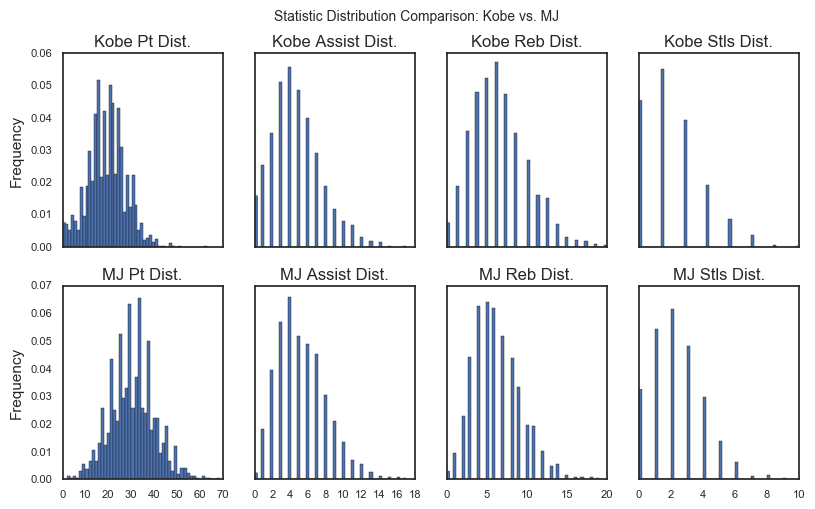

In [54]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(9.5, 5.5)
fig.suptitle('Statistic Distribution Comparison: Kobe vs. MJ ')
agg_kobe['PTS'].plot(ax = ax[0,0],
                     kind='hist',
                     bins = 50,
                     sharex= True,
                     title = 'Kobe Pt Dist.',
                     fontsize=8,
                     normed=True)

agg_jordan['PTS'].plot(ax = ax[1,0],
                     kind='hist',
                     bins = 50,
                     sharex = True,
                     sharey = True,
                     title = 'MJ Pt Dist.',
                     fontsize=8,
                     normed=True)

agg_kobe['AST'].plot(ax = ax[0,1],
                     kind='hist',
                     bins = 50,
                     sharey = True,
                     title = 'Kobe Assist Dist.',
                     fontsize=8,
                     normed=True)

agg_jordan['AST'].plot(ax = ax[1,1],
                     kind='hist',
                     bins = 50,
                     sharex= True,
                     sharey=True,
                     title = 'MJ Assist Dist.',
                     fontsize=8,
                     normed=True)

agg_kobe['REB'].plot(ax = ax[0,2],
                     kind='hist',
                     bins = 50,
                     sharey = True,
                     title = 'Kobe Reb Dist.',
                     fontsize=8,
                     normed=True)

agg_jordan['REB'].plot(ax = ax[1,2],
                     kind='hist',
                     bins = 50,
                     sharex= True,
                     sharey=True,
                     title = 'MJ Reb Dist.',
                     fontsize=8,
                     normed=True)

agg_kobe['STL'].plot(ax = ax[0,3],
                     kind='hist',
                     bins = 50,
                     sharey = True,
                     title = 'Kobe Stls Dist.',
                     fontsize=8,
                     normed=True)

agg_jordan['STL'].plot(ax = ax[1,3],
                     kind='hist',
                     bins = 50,
                     sharex= True,
                     sharey=True,
                     title = 'MJ Stls Dist.',
                     fontsize=8,
                     normed=True)


Besides Jordan's points scored distribution having a higher mean than that of Kobe and a tighter distribution for Jordan's career rebounds, we do not see any significant differences. 

We then take a more numeric approach. Through the `.std()` method, we can see the standard deviations of the career statistics of Kobe and Jordan to measure how much each player fluctuates in their career stats:

In [55]:
print(agg_kobe.std())
print()
print(agg_jordan.std())

Player_ID           0.000000
MIN                 8.647248
FGM                 3.949019
FGA                 7.401612
FG_PCT              0.132591
FG3M                1.463009
FG3A                2.882893
FG3_PCT             0.262201
FTM                 4.017196
FTA                 4.595786
FT_PCT              0.251492
OREB                1.156185
DREB                2.424830
REB                 2.792723
AST                 2.788888
STL                 1.275409
BLK                 0.783006
TOV                 1.872950
PF                  1.423977
PTS                10.605674
PLUS_MINUS         12.702289
VIDEO_AVAILABLE     0.319054
dtype: float64

Player_ID           0.000000
MIN                10.806914
FGM                 3.841533
FGA                 6.005853
FG_PCT              0.107084
FG3M                0.993655
FG3A                1.869167
FTM                 4.121566
FTA                 4.703144
FT_PCT              0.204070
REB                 2.992680
AST                 2.75508

In [29]:
print(agg_kobe.std()-agg_jordan.fillna(0).std())

Player_ID          0.000000
MIN               -2.159666
FGM                0.107486
FGA                1.395759
FG_PCT             0.025507
FG3M               0.469355
FG3A               1.018274
FG3_PCT           -0.043419
FTM               -0.104369
FTA               -0.107358
FT_PCT             0.045047
OREB              -0.275116
DREB              -0.277736
REB               -0.199957
AST                0.033805
STL               -0.419414
BLK               -0.217799
TOV                0.063943
PF                -0.071785
PTS                0.913923
PLUS_MINUS         5.704469
VIDEO_AVAILABLE    0.319054
dtype: float64


We see that Jordan is more consistent with his scoring throughout his career than Kobe with a standard deviation of 9.69 in points compared to a standard deviation of 10.60 to Kobe as well as assists, with a standard deviation of 2.76 for Jordan to Kobe's 2.79. However, Kobe has stronger career consistency in terms of rebounds and steals. 

These differences are not significant enough to draw any conclusions for comparing the two players. 

We move on to evaluate specifically how playing in the playoffs affect both player's performance statsitcs, or their respective 'clutch'. We will name the percent difference in performance statstics during the post season 'clutch factor'.

First, we compile the Kobe's statistical averages for the regular and post season into one dataframe:

In [30]:
kobe_rmean_df = pd.DataFrame(agg_kobe_reg.mean())
kobe_rmean_df.columns = ['kobe_reg_mean']
kobe_rmean_df = kobe_rmean_df.reset_index()
kobe_rmean_df.tail()

,index,kobe_reg_mean
17,TOV,2.979198
18,PF,2.491085
19,PTS,24.994799
20,PLUS_MINUS,3.087667
21,VIDEO_AVAILABLE,0.133730


In [31]:
kobe_pmean_df = pd.DataFrame(agg_kobe_po.mean())
kobe_pmean_df.columns = ['kobe_po_mean']
kobe_pmean_df = kobe_pmean_df.reset_index()
kobe_pmean_df.tail()

,index,kobe_po_mean
17,TOV,2.940909
18,PF,3.000000
19,PTS,25.636364
20,PLUS_MINUS,2.536364
21,VIDEO_AVAILABLE,0.000000


In [32]:
kobe_clutch = pd.merge(kobe_rmean_df, kobe_pmean_df, how = 'right')
kobe_clutch.tail()

,index,kobe_reg_mean,kobe_po_mean
17,TOV,2.979198,2.940909
18,PF,2.491085,3.000000
19,PTS,24.994799,25.636364
20,PLUS_MINUS,3.087667,2.536364
21,VIDEO_AVAILABLE,0.133730,0.000000


Then we generate a new column showing the percent improvement by generating a new column: 

In [33]:
kobe_clutch['k_clutch_factor'] = 100*(kobe_clutch['kobe_po_mean'] - kobe_clutch['kobe_reg_mean'])/kobe_clutch['kobe_reg_mean']
kobe_clutch.tail()

,index,kobe_reg_mean,kobe_po_mean,k_clutch_factor
17,TOV,2.979198,2.940909,-1.285196
18,PF,2.491085,3.000000,20.429466
19,PTS,24.994799,25.636364,2.566791
20,PLUS_MINUS,3.087667,2.536364,-17.855018
21,VIDEO_AVAILABLE,0.133730,0.000000,-100.000000


We apply the same to Jordan's data:

In [34]:
jordan_rmean_df = pd.DataFrame(agg_jordan_reg.fillna(0).mean())
jordan_rmean_df.columns = ['jordan_reg_mean']
jordan_rmean_df = jordan_rmean_df.reset_index()


jordan_pmean_df = pd.DataFrame(agg_jordan_po.mean())
jordan_pmean_df.columns = ['jordan_po_mean']
jordan_pmean_df = jordan_pmean_df.reset_index()

jordan_clutch = pd.merge(jordan_rmean_df, jordan_pmean_df, how = 'right')
jordan_clutch['j_clutch_factor'] = 100*(jordan_clutch['jordan_po_mean'] - jordan_clutch['jordan_reg_mean'])/jordan_clutch['jordan_reg_mean']
jordan_clutch.tail()

,index,jordan_reg_mean,jordan_po_mean,j_clutch_factor
15,BLK,0.770522,0.882682,14.556251
16,TOV,2.456157,3.050279,24.189117
17,PF,2.364739,3.022346,27.808888
18,PTS,30.123134,33.446927,11.034021
19,VIDEO_AVAILABLE,0.000000,0.000000,NaN


We can then merge the two dataframes, and drop all the rows which are unrelated to the points scored, assists, and rebound categories. 

In [35]:
clutch_factor = pd.merge(kobe_clutch, jordan_clutch)
clutch_factor=clutch_factor.set_index('index')
clutch_factor.shape

(20, 6)

In [36]:
clutch_factor_t = clutch_factor.drop(clutch_factor.index[0:12])
clutch_factor_tt = clutch_factor_t.drop(clutch_factor_t.index[3:6])
clutch_factor_tt = clutch_factor_tt.drop(clutch_factor_tt.index[4])
clutch_factor_f = clutch_factor_tt

In [37]:
clutch_factor_f

,kobe_reg_mean,kobe_po_mean,k_clutch_factor,jordan_reg_mean,jordan_po_mean,j_clutch_factor
index,,,,,,
REB,5.235513,5.086364,-2.848794,6.223881,6.435754,3.404204
AST,4.684993,4.727273,0.902459,5.254664,5.709497,8.655796
STL,1.444279,1.409091,-2.436401,2.162313,2.100559,-2.855958
PTS,24.994799,25.636364,2.566791,30.123134,33.446927,11.034021


To understand the differences in percent difference, we can create a graphical representation of 'clutch factor' through the following plot:

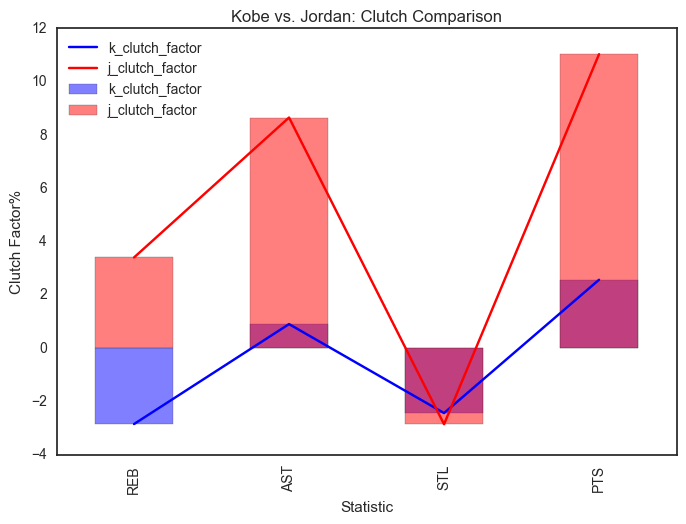

In [38]:
fig, ax = plt.subplots()
clutch_factor_f['k_clutch_factor'].plot(kind = 'line',
                                       color = 'blue',
                                       legend = True)
clutch_factor_f['j_clutch_factor'].plot(kind = 'line',
                                     color = 'red',
                                     legend = True)
clutch_factor_f['k_clutch_factor'].plot(kind = 'bar',
                                       color = 'blue',
                                        alpha = .5,
                                       legend = True)
clutch_factor_f['j_clutch_factor'].plot(kind = 'bar',
                                     color = 'red',
                                        alpha = .5,
                                     legend = True)
ax.set_ylabel('Clutch Factor%')
ax.set_xlabel('Statistic')
ax.set_title('Kobe vs. Jordan: Clutch Comparison')

The difference between the two players are more obvious in this figure. In every statistic other than steals, Michael Jordan's statistics improve during playoff time. Although Kobe does perform better in terms of assists and points scored in the post-season, he rebounds less and makes fewer steals. Jordan's improvements in assists and points scored are also to a much greater degree than to that of Kobe. 

We will try to extend the definition of 'clutch' to encapsulate efficiency improvements during playoff time as well. Both Kobe and Jordan are [Shooting Guards (SG)](https://en.wikipedia.org/wiki/Shooting_guard). Their role on a basketball team is heavily based on the points they contribute to the game. To understand their production efficiency, we can look at their points per minute metric. We will run a regression on the data between points scored and minutes played, and will compare the differences in the slopes of the regression between the regular and post season for the two players.


We will be using NumPy's `.polyfit` method to apply a least-square regression on the data. We've noticed that some of Michael Jordan's data is lacking the minutes data, thus we will be dropping those data points for the case of this regression.

(0, 60)

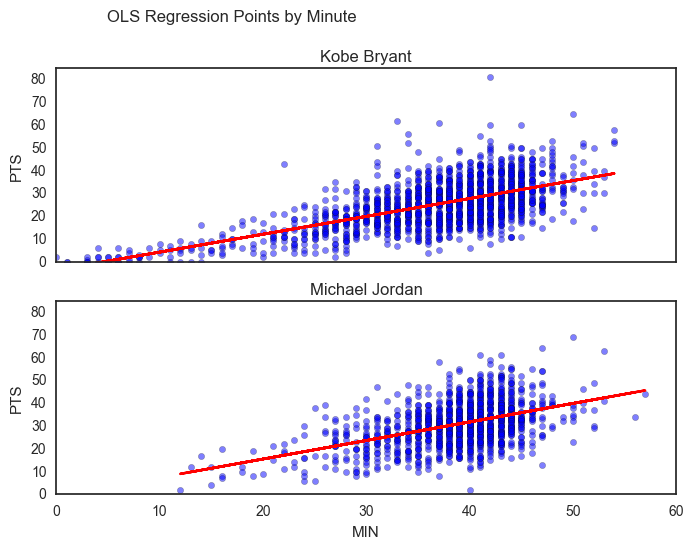

In [56]:
fig, ax = plt.subplots(2)
fig.suptitle('OLS Regression Points by Minute', horizontalalignment= 'right', verticalalignment = 'bottom', size = 12)
agg_jordan_m = agg_jordan.drop(agg_jordan.index[agg_jordan['MIN']==0.0],axis = 0) #dropping missing or broken data


k_coeff = np.polyfit(x = agg_kobe['MIN'], y = agg_kobe['PTS'], deg =1)
k_ffit = np.poly1d(k_coeff)
k_linreg = k_ffit(agg_kobe['MIN'])
k_linreg = pd.DataFrame(k_linreg)
k_linreg.columns = ['VAL']

j_coeff = np.polyfit(x = agg_jordan_m['MIN'], y = agg_jordan_m['PTS'], deg =1)
j_ffit = np.poly1d(j_coeff)
j_linreg = j_ffit(agg_jordan_m['MIN'])
j_linreg = pd.DataFrame(j_linreg)
j_linreg.columns = ['VAL']

k_linreg.plot(ax=ax[0],
           kind = 'line',
           x = agg_kobe['MIN'],
           legend = False,
           color = 'red')

j_linreg.plot(ax=ax[1],
           kind = 'line',
           x = agg_jordan_m['MIN'],
           legend = False,
           color = 'red')

agg_kobe.plot(ax=ax[0],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'Kobe Bryant',
              sharex = True,
              ylim = (0,85))

agg_jordan_m.plot(ax=ax[1],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'Michael Jordan',
              ylim = (0,85))

ax[0].set_xlim(0,60)
ax[1].set_xlim(0,60)

According to the slope of the ordianry least-square regression, the career points per minute for Kobe and Jordan are as follows:

In [40]:
kobe_career_ppm = k_ffit[1]
kobe_career_ppm

0.78405926634808698

In [41]:
jordan_career_ppm = j_ffit[1]
jordan_career_ppm

0.81381823309935597

Overall, Jordan is more efficient than Kobe in terms of points production by minute by looking at the slope of the OLS regression. 

Now we may separate their statistics from Regular Season and Playoff Season to see the difference in the points per minute metric, or their production efficiency 'clutch', when it comes to the postseason. 

We generate separate OLS regression for each section of the data:

In [42]:
agg_jordan_reg1 = agg_jordan_reg.drop(agg_jordan_reg.index[agg_jordan_reg['MIN']==0.0],axis = 0) 

k_reg_coeff = np.polyfit(x = agg_kobe_reg['MIN'], y = agg_kobe_reg['PTS'], deg =1)
k_reg_ffit = np.poly1d(k_reg_coeff)
k_reg_linreg = k_ffit(agg_kobe_reg['MIN'])
k_reg_linreg = pd.DataFrame(k_reg_linreg)
k_reg_linreg.columns = ['VAL']

k_po_coeff = np.polyfit(x = agg_kobe_po['MIN'], y = agg_kobe_po['PTS'], deg =1)
k_po_ffit = np.poly1d(k_po_coeff)
k_po_linreg = k_ffit(agg_kobe_po['MIN'])
k_po_linreg = pd.DataFrame(k_po_linreg)
k_po_linreg.columns = ['VAL']

j_reg_coeff = np.polyfit(x = agg_jordan_reg1['MIN'], y = agg_jordan_reg1['PTS'], deg =1)
j_reg_ffit = np.poly1d(j_reg_coeff)
j_reg_linreg = j_reg_ffit(agg_jordan_reg1['MIN'])
j_reg_linreg = pd.DataFrame(j_reg_linreg)
j_reg_linreg.columns = ['VAL']

j_po_coeff = np.polyfit(x = agg_jordan_po['MIN'], y = agg_jordan_po['PTS'], deg =1)
j_po_ffit = np.poly1d(j_po_coeff)
j_po_linreg = j_po_ffit(agg_jordan_po['MIN'])
j_po_linreg = pd.DataFrame(j_po_linreg)
j_po_linreg.columns = ['VAL']

Using the regressions and career statistics data we had previously compiled, we can plot the data into a 2 x 2 subplot: 

(0, 60)

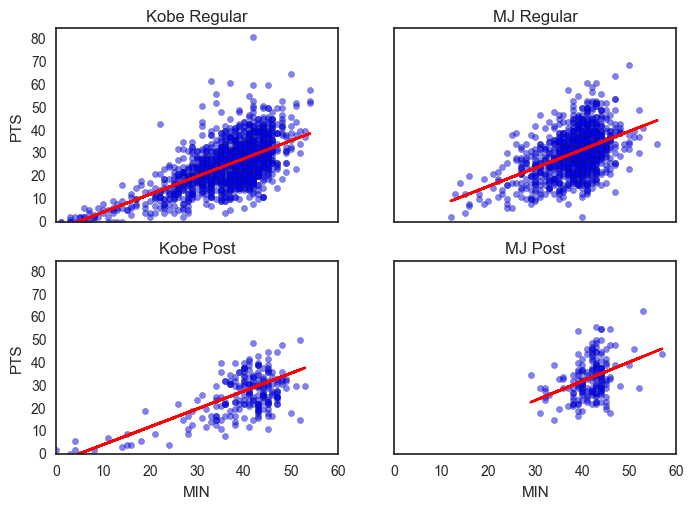

In [43]:
fig, ax = plt.subplots(2,2)

agg_jordan_reg1.plot(ax=ax[0,1],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'MJ Regular',
              ylim = (0,85),
              sharex = True,
              sharey = True)

j_reg_linreg.plot(ax=ax[0,1],
           kind = 'line',
           x = agg_jordan_reg1['MIN'],
           legend = False,
           color = 'red')

agg_jordan_po.plot(ax=ax[1,1],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'MJ Post',
              ylim = (0,85))

j_po_linreg.plot(ax=ax[1,1],
           kind = 'line',
           x = agg_jordan_po['MIN'],
           legend = False,
           color = 'red')

agg_kobe_reg.plot(ax=ax[0,0],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'Kobe Regular',
              ylim = (0,85))

k_reg_linreg.plot(ax=ax[0,0],
           kind = 'line',
           x = agg_kobe_reg['MIN'],
           legend = False,
           color = 'red')


agg_kobe_po.plot(ax=ax[1,0],
              kind = 'scatter',
              x = 'MIN',
              y = 'PTS',
              color = 'blue',
              alpha = 0.5,
              title = 'Kobe Post',
              ylim = (0,85))

k_po_linreg.plot(ax=ax[1,0],
           kind = 'line',
           x = agg_kobe_po['MIN'],
           legend = False,
           color = 'red')

ax[0,0].set_xlim(0,60)
ax[0,1].set_xlim(0,60)
ax[1,0].set_xlim(0,60)
ax[1,1].set_xlim(0,60)

Looking at the scatter data, Jordan's Post season production efficiency stats seem to have a steeper slope than that of Kobe's, with their regular season efficiencies looking relatively similar. The efficiency 'clutch' improvement is calculated as follows: 

In [44]:
k_reg_ppm = k_reg_ffit[1]
k_po_ppm = k_po_ffit[1]
print('Kobe:',k_reg_ppm, 'points per minute during the Regular Season')
print('Kobe:',k_po_ppm, 'points per minute during the Post Season')
print('Production Efficiency Clutch:', ((k_po_ppm-k_reg_ppm)/k_reg_ppm)*100,'%')

Kobe: 0.811275214269 points per minute during the Regular Season
Kobe: 0.693349959295 points per minute during the Post Season
Production Efficiency Clutch: -14.5357891995 %


In [45]:
j_reg_ppm = j_reg_ffit[1]
j_po_ppm = j_po_ffit[1]
print('Jordan:',j_reg_ppm, 'points per minute during the Regular Season')
print('Jordan:',j_po_ppm, 'points per minute during the Post Season')
print('Production Efficiency Clutch:', ((j_po_ppm-j_reg_ppm)/j_reg_ppm)*100,'%')

Jordan: 0.805195007487 points per minute during the Regular Season
Jordan: 0.838323050257 points per minute during the Post Season
Production Efficiency Clutch: 4.11428814903 %


Looking at clutch in terms of production efficiency, Jordan does better than Kobe, as Kobe actually scores over 10% fewer points per minute in the post season than in the regular season. This indicates that our previous analysis of Kobe having more points scored in the playoffs may simply be a product of him having more minutes on the court during his career postseasons.  

## Conclusion: Jordan is More 'Clutch'

Looking at the results from the data we pulled from Kobe and Jordan's career stats, we see that Jordan does hold the edge in terms of overall improvement during the playoffs over the regular season, or as what we defined as 'clutch'. Although there were not an enormous difference in their raw career stats in quantity and consistency, the disparity between regular season and the post season is observable for both key stats such as points scored, assists, rebounds, and steals, as well as production efficiency in terms of points per minute. 

This difference in 'clutch' provides some quantitative reasoning behind the difference in [awards](http://www.landofbasketball.com/player_comparison/kobe_bryant_vs_michael_jordan.htm) and [accolades](http://bleacherreport.com/articles/606284-why-michael-jordan-will-always-be-better-than-kobe-bryant) Kobe and Jordan had garnered respectively in their careers. Both are obviously great players, but this may be part of the reason why many diehard fans as well as mainstream sports analysts such as ESPN consider Jordan to be the [G.O.A.T.](http://www.espn.com/nba/story/_/page/nbarank1/all-nbarank-1) (Greatest of All Time) and Kobe just a [legend in passing](http://www.espn.com/nba/story/_/page/nbarank160205/all-nbarank-11-15) (check No.12). 

Potential errors in this data report could be issues with multicollinearity on the regression for the production per minute OLS regression as well as the accounting for minor adjustments in averages due to Kobe playing 20 seasons in the NBA compared to Jordan's 15 (as he took a year break to pursue professional baseball, as well as a hiatus before joining the Washington Wizards). 

This is the end of my project. I hope you had as much fun reading it as I had writing it. 